<a href="https://colab.research.google.com/github/evs-11/IA-aumentada-prevision-de-atrasos-de-vuelos/blob/main/optimizaci%C3%B3n_aeroportuaria_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Explorando los datos**

###**Entendiendo el conjunto de datos**

El tema de discusión será la optimización aeroportuaria. El problema de negocios consiste en prever el atraso de los vuelos para optimizar los procesos operativos del aeropuerto.

En esta primera fase del proyecto, nos concentraremos en desarrollar un modelo que permita prever el atraso en el menor tiempo posible. Esto significa que, si un vuelo se atrasa, tendremos un margen de tiempo para determinar si realmente saldrá en el horario previsto, mejorando la experiencia de los usuarios y reduciendo costos operacionales para las aerolíneas y los aeropuertos.

In [1]:
#importamos biblioteca, creamos variable y leemos datos
import pandas as pd

datos = pd.read_csv('/content/flights.csv')
datos.shape            # vemos la forma del conjunto de datos

(71175, 11)

In [2]:
# vemos 5 primeras filas
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


Las columnas incluyen la identificación del vuelo (flight ID), la aerolínea (airline), el tipo de aeronave (aircraft), si pertenece al espacio Schengen o no, el origen (origin), el horario de llegada (arrival time), el horario de salida (departure time), el día del año (day), si es feriado (is holiday), y nuestra variable respuesta que es el retraso (delay).
Esta variable está en minutos y segundos. Por ejemplo, el vuelo 26 de la aerolínea MM tuvo un retraso de 70 minutos y aproximadamente 12 segundos. Sabemos que son 12 segundos porque multiplicamos el valor decimal por 60. Utilizaremos el método round para mostrar que son aproximadamente 12 segundos.

In [3]:
# multiplicamos el valor decimalde delay (.20 por 60 segundos
round(.20*60)
# para el horario de salida es igual arrival_time(.88 por 60 segundos)
#round(.88*60)
# 53 ( o sea 8.53 minutos)

12

Para obtener una visión global del conjunto de datos, realizaremos un análisis exploratorio. Utilizaremos el método info con datos.info para conocer los metadatos, que son datos sobre los datos. Esto nos indica que tenemos un total de 11 columnas y 71,175 registros, desde el 0 al 71,174. Cada columna tiene un número consecutivo, comenzando con Flight ID y terminando con Delay.

Todos los registros son no nulos, lo que significa que ya tienen un valor asignado, por lo que no necesitamos preocuparnos por tratar valores nulos en este momento. En cuanto al tipo de datos, observamos que los enteros (int64) incluyen la identificación del vuelo, el día del año y el año.
El atraso(delay)está en minutos.


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


Podemos ir un poco más allá en este análisis exploratorio y utilizar el método de pandas describe, datos.describe, para ver la descripción de la estadística como tal de estos valores, obteniendo algunas medidas de tendencia central y los cuantiles, el desvío estándar y así sucesivamente. A través de este método describe, tomaremos como referencia, por ejemplo, la variable respuesta, que sería el retraso(delay).


In [5]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


El conteo de valores para todos es 71,175. El promedio de retraso, es decir, si sacamos el promedio de retraso de todos los vuelos, sumando todos los minutos y dividiéndolos entre el total de observaciones, es de 12 minutos y alrededor de 30 segundos.

El desvío estándar, o sea, la variación que puede tener desde ese promedio, es de 23 minutos, lo cual es un desvío bastante grande, un margen muy amplio con respecto a ese promedio. Tenemos el valor mínimo de retraso y un valor máximo de retraso.

¿Qué quiere decir este menos 41? Quiere decir que estos vuelos, o este vuelo, esta observación que es el valor mínimo, no se retrasó sino que, por el contrario, salió 41 minutos adelantado. El valor mínimo indica que hay un vuelo dentro de los 71 mil registros que salió 41 minutos adelantado.
Si tomamos nuestro conjunto de datos y ordenamos de menor a mayor todos los valores de retraso, hasta el 25% de los vuelos salieron con algún adelanto. Observamos que el primer cuantil, que es este 25%, dice menos 4.41, lo que equivale a alrededor de 4 minutos y 25 segundos. Esto significa que hasta el 25% de los vuelos han salido no solo dentro del tiempo, sino incluso más rápido de lo esperado.

Si continuamos viendo la secuencia hasta el 50% de los datos, que sería la mediana o el segundo cuantil, ya observamos un atraso de alrededor de 9 minutos y 45 segundos.

Al avanzar un poco más, hasta el 75% de los datos, ya hay un atraso de 27 minutos y alrededor de 40 segundos. Comenzamos a observar que se presenta un atraso considerable, lo cual genera pérdidas y situaciones incómodas tanto para los pasajeros como para la aerolínea y el aeropuerto. El valor máximo de atraso es de hasta 125 minutos, es decir, más de dos horas de atraso.

La idea de observar estas medidas o de hacer este análisis exploratorio es ver cómo se comporta el atraso de los vuelos y generar un modelo de aprendizaje de máquina apoyándonos en los recursos que nos permiten las bibliotecas de Scikit Learn para tener una previsión.

Si algún vuelo tiene ciertas características, con un margen de error, queremos acercarnos lo máximo posible a cuánto ese vuelo podría potencialmente demorarse. De modo que el plan de estacionamiento o de taxi de las aeronaves quede mejor elaborado, considerando ese margen, para eliminar este tipo de trastornos.


También podemos ver no solo las variables numéricas, sino las variables categóricas. Añadimos en nuestra descripción include='O'("all"), lo que nos dará también la estadística descriptiva de las variables categóricas. De las aerolíneas, tenemos tres, y la que más se muestra es la aerolínea BZ con 47,598 ocurrencias de aeronaves.
Tenemos seis tipos distintos de aeronave, siendo el Airbus A320 el más frecuente en nuestros registros, con más de 30,700 registros. En cuanto al espacio Schengen, hay dos posibles clases: Schengen y no Schengen, siendo Schengen la más frecuente, con más de 42,000 ocurrencias.
Por último, la variable de origen, que sería el aeropuerto de origen, tiene 10 aeropuertos desde donde llegan vuelos al aeropuerto que analizamos, siendo el aeropuerto con la sigla TZF el que más vuelos recibe, con 14,162 ocurrencias.

In [6]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


###**Análisis gráfico del conjunto de datos**

Ya realizamos un análisis exploratorio calculando algunas medidas de la estadística descriptiva de este conjunto de datos y observamos algunos valores muy interesantes. Sin embargo, vamos a realizar un análisis visual.

 importaremos las dos bibliotecas necesarias para graficar nuestros datos: import seaborn as sns y import matplotlib.pyplot as plt.
 Queremos analizar los atrasos de vuelos con respecto a las aerolíneas y también el número de vuelos por cada aerolínea o compañía aérea. Para ello, observaremos el promedio de retraso. Crearemos una variable que llamaremos avg_delay (average delay).
Tomaremos nuestro conjunto de datos y agruparemos por aerolínea utilizando groupby. Abrimos y cerramos paréntesis, agrupamos por aerolínea y colocamos directamente entre corchetes la variable respuesta, que sería delay.

Como estamos utilizando un método de agregación, debemos emplear una función asociada, que en este caso será el promedio. Queremos que esto no quede como un índice, sino como una columna, por lo que debemos hacer un reset_index.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()

realizaremos nuestro gráfico utilizando sns.barplot, que es un gráfico de barras. En el eje x colocaremos la aerolínea y en el eje y el retraso (delay). El conjunto de datos será avg_delay, por lo que especificamos data=avg_delay.

También daremos un título a nuestro gráfico con plt.title, que será "Compañías aéreas versus atraso promedio". Colocaremos las etiquetas de cada uno de los ejes: plt.xlabel para el eje x, donde indicaremos "Compañía aérea", y plt.ylabel para el eje y, donde indicaremos "Atraso promedio" con la unidad en minutos.

Vamos a utilizar plt.show() para mostrar este gráfico. Aprovechando la misma celda, crearemos un gráfico que nos permita ver el número de vuelos por compañía aérea.

Para ello, utilizaremos un countplot. Entonces, escribimos sns.countplot y especificamos nuestros datos con data=datos. En el eje x, colocaremos la aerolínea (airline). También le daremos un título, que será "Número de vuelos por compañía aérea". Cambiamos el título, colocamos en x la compañía aérea y en y el número de vuelos.

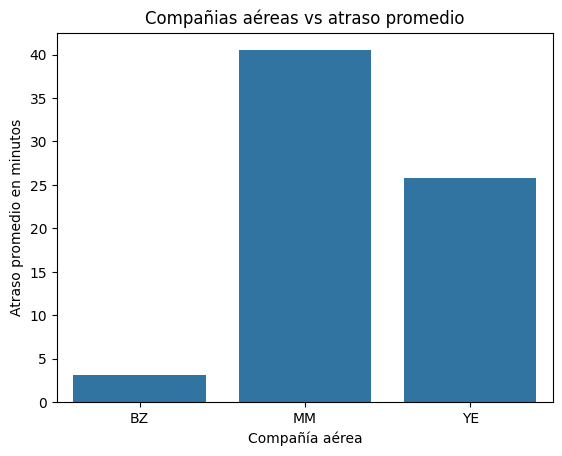

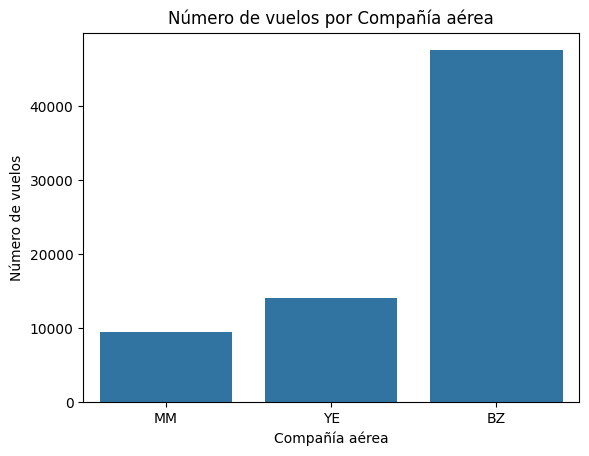

In [8]:
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Compañias aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por Compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()


Primero veremos las compañías aéreas versus el atraso promedio. Observamos que el atraso promedio en minutos de la aerolínea M-M es de 40 minutos, de la aerolínea Y-E es de hasta 25 minutos, y en B-Z el atraso promedio es de alrededor de tres minutos.

En cuanto a la cantidad de vuelos por compañía aérea, notamos que la que más vuelos tiene es B-Z con más de 40 mil vuelos, mientras que la que menos tiene es M-M con alrededor de 10 mil vuelos.

Continuaremos investigando y generando más gráficos. El siguiente gráfico mostrará la cantidad de atraso promedio según si el aeropuerto de origen está en el espacio Schengen o no. Cambiamos el eje x a Schengen, manteniendo el atraso promedio. El título será "Tipo de vuelo versus atraso promedio".



En el eje x colocaremos el tipo de vuelo y en y el atraso promedio en minutos. También haremos un conteo de los vuelos que son del espacio Schengen, con el título "Número de vuelos por tipo". En x será el tipo de vuelo y en y el número de vuelos.



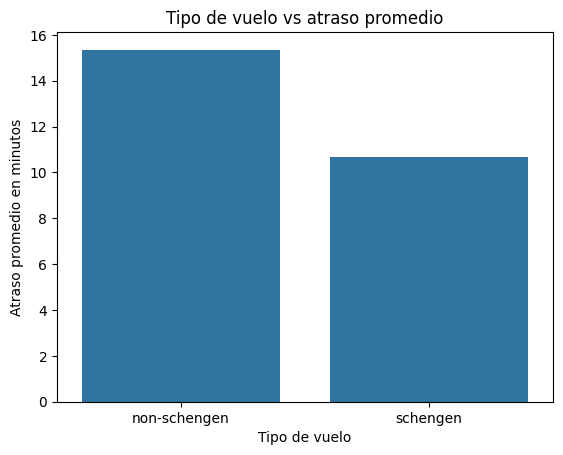

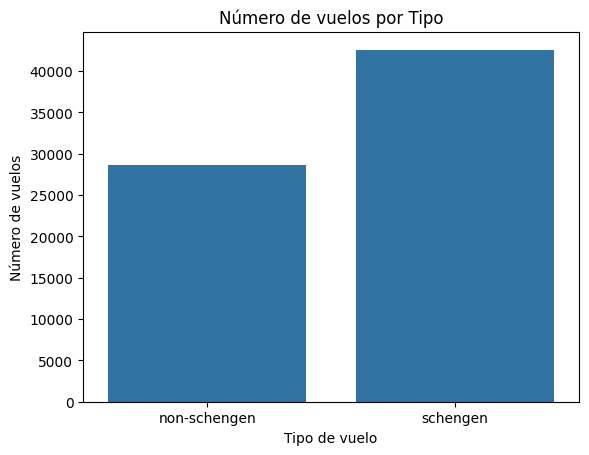

In [9]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

Al observar los gráficos, notamos que los vuelos que no son Schengen tienen un atraso promedio de más de 15 minutos, mientras que los del espacio Schengen tienen un atraso promedio de alrededor de 10 minutos.

La cantidad de vuelos más numerosa corresponde a los vuelos Schengen, con más de 40.000 vuelos, y los de espacios no Schengen tienen alrededor de 30.000 vuelos. Esta es una forma interesante de comprender la dinámica de este aeropuerto.

También realizaremos un análisis sobre si estos atrasos ocurren más en días feriados. Copiaremos el código anterior y, en lugar de utilizar Schengen, usaremos la variable isHoliday. Cambiaremos todas las ocurrencias a "días feriados". El gráfico mostrará el promedio de atraso si es día feriado o no.

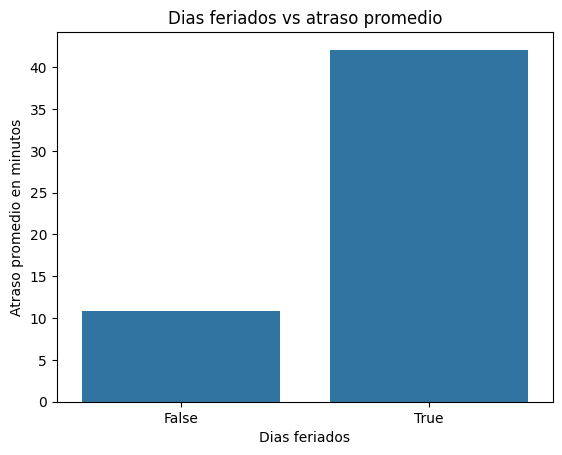

In [10]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Dias feriados vs atraso promedio')
plt.xlabel('Dias feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()


Observamos que en días feriados se presentan atrasos de más de 40 minutos, mientras que en días no feriados el atraso es de hasta 12 minutos en promedio. Estos datos son interesantes y nos permiten considerar la dinámica del aeropuerto para mitigar los atrasos en días feriados.

Analizaremos la cantidad de aeronaves que llegan al aeropuerto, es importante. Para ello, haremos un countplot y tomaremos los valores de las aeronaves. Estableceremos un orden utilizando datos['aircraft_type'].value_counts().index, que ordena de mayor a menor cantidad. Esto nos organiza todas las aeronaves, y las almacenaremos en order.



Antes de continuar, mostraremos qué devuelve este gráfico. Nos devuelve un índice indicando que las aeronaves más numerosas son Airbus A320, seguidas de Airbus A330, y así sucesivamente.
Si solo queremos ver los valores, podemos ejecutar la celda para verificar que están en el mismo orden: Airbus A320, Airbus A330, y el último es el Boeing 777. Este método nos permite tener a mano el orden de las aeronaves.


In [11]:
datos['aircraft_type'].value_counts()#.index
# 'Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175','Boeing 737', 'Boeing 777' (ver con .index)


,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


En el countplot, colocaremos en x el tipo de aeronave (aircraft_type) y el orden será el mismo. El título será "Número de vuelos por tipo de aeronave". Añadiremos una rotación de 70 grados a las etiquetas del eje x para evitar que se sobrepongan debido a los nombres largos de las aeronaves.

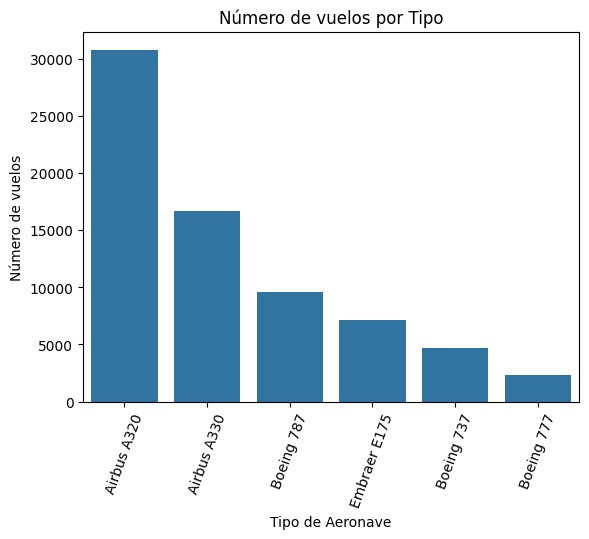

In [12]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type',order=order)
plt.title('Número de vuelos por Tipo')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

Al graficar, podemos observar la cantidad de vuelos con respecto a las aeronaves, obteniendo información relevante para comprender el comportamiento de los vuelos en este aeropuerto

###**el Espacio Schengen**

El Espacio Schengen es un área geográfica que abarca la mayoría de los países europeos, donde se han eliminado los controles fronterizos para permitir la libre circulación de personas entre los países miembros. Esta área recibe su nombre en referencia al Acuerdo de Schengen, firmado en 1985 en la aldea de Schengen, en Luxemburgo, e implementado en 1995.

El acuerdo fue nombrado así por el lugar de la firma, pero el tratado Schengen en sí fue un desarrollo del Acuerdo de Schengen de 1990.
Los países que forman parte del Espacio Schengen han abolido los controles fronterizos en las fronteras internas, lo que significa que no es necesario presentar un pasaporte o pasar por verificaciones de inmigración al viajar entre estos países. En las fronteras externas, sin embargo, es más riguroso y común, para garantizar la seguridad y el control de la inmigración.

Actualmente, la mayoría de los países de la Unión Europea (UE) forman parte del Espacio Schengen, junto con Noruega, Islandia, Suiza y Liechtenstein, que no son miembros de la UE. Sin embargo, es importante notar que no todos los países de la UE han adherido al Acuerdo de Schengen.

La libre circulación dentro del Espacio Schengen facilita los viajes y el comercio entre los países miembros, convirtiéndolo en una parte fundamental de la integración europea y un ejemplo de cooperación transfronteriza en cuestiones de seguridad e inmigración.

###**Analizando la distribución de los datos**

Ya hemos generado algunas visualizaciones exploratorias de nuestros datos. Sin embargo, es muy importante que entendamos cómo están distribuidos.

Para ello, nos apoyaremos en un instrumento llamado histograma, que nos permite analizar la frecuencia de nuestros diferentes valores. Nos concentraremos en los que más nos interesan, como el horario de llegada de los vuelos, el horario de salida y, principalmente, el atraso en minutos.

Para esto, crearemos nuestro histograma utilizando sns.histplot.
Nuestros datos serán data=datos, y en x comenzaremos con el horario de llegada, añadiendo una curva de densidad con kde=True.

<Axes: xlabel='arrival_time', ylabel='Count'>

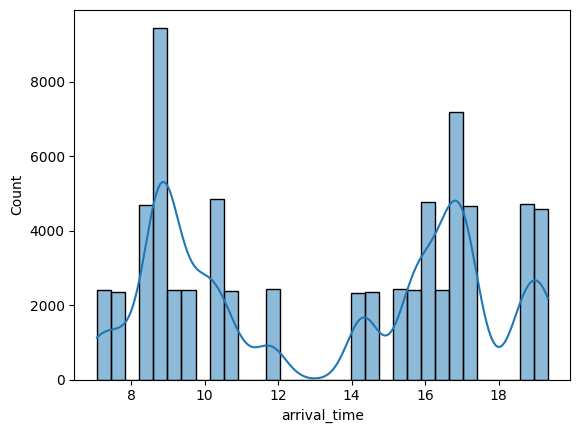

In [13]:
sns.histplot(data=datos,x='arrival_time',kde=True)

Así, podremos observar cómo está distribuido nuestro horario de llegada. Notamos aquí una curva de densidad interesante, pero surge la pregunta de si el ancho de los bins que estamos utilizando es el más adecuado. Es difícil determinarlo a simple vista sin un análisis matemático que nos permita establecerlo.

Podríamos apoyarnos en la regla de Friedman-Diaconis, que nos ayuda a establecer que el ancho de los bins es igual a dos veces el rango intercuartil dividido entre la raíz cúbica de la cantidad de observaciones.

Esto nos proporciona el valor ideal para seleccionar el ancho de los bins en un histograma.


Ya tenemos a mano una función utilizando NumPy que nos permite recrear esta fórmula. Básicamente, es una función que nos ayuda a establecer el rango intercuartil, que se calcula restando el tercer cuartil del primer cuartil, utilizando la función percentile de NumPy, atribuyendo como parámetro el nombre de la columna para la cual queremos hacer la medición.
Luego, multiplicamos dos veces el valor intercuartil y lo multiplicamos por la cantidad de observaciones de esa columna, utilizando el método len y elevándolo a la menos un tercio. Elevar a la menos un tercio significa raíz cúbica en el denominador; si lo eleváramos a un tercio, sería raíz cúbica en el numerador. Según la función, la raíz cúbica se encuentra en el denominador, por eso es a la menos un tercio.

Creamos nuestra función y ahora vamos a crear una variable que llamaremos binwidth. Básicamente, lo que hacemos es establecer el ancho del bin, colocando los dos parámetros: nuestro conjunto de datos y el nombre de la columna, que es arrival_time.

Traemos de nuevo nuestro código, lo pegamos y añadimos binwidth, estableciendo binwidth=binwidth. Luego, realizamos el gráfico. Es un gráfico bastante parecido al anterior, pero aquí ya estamos utilizando un método más adecuado para establecer el ancho de los bins.

In [14]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

Creamos nuestra función y ahora vamos a crear una variable que llamaremos binwidth. Básicamente, lo que hacemos es establecer el ancho del bin, colocando los dos parámetros: nuestro conjunto de datos y el nombre de la columna, que es arrival_time.

Traemos de nuevo nuestro código, lo pegamos y añadimos binwidth, estableciendo binwidth=binwidth. Luego, realizamos el gráfico.

<Axes: xlabel='arrival_time', ylabel='Count'>

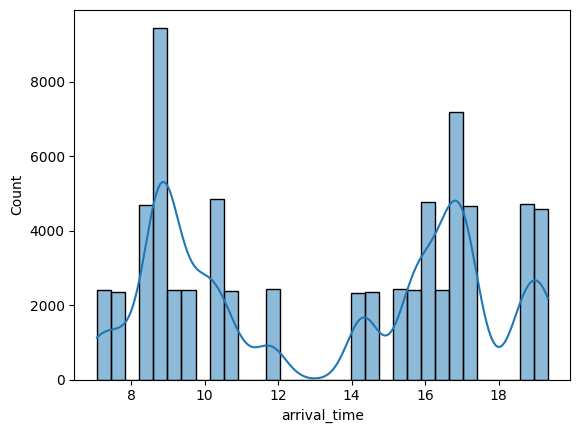

In [15]:
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos,x='arrival_time',kde=True)


Es un gráfico bastante parecido al anterior, pero aquí ya estamos utilizando un método más adecuado para establecer el ancho de los bins.

También podríamos hacerlo manualmente, simplemente diciendo, por ejemplo, 10 bins. En vez de utilizar binwidth, colocamos bins=10 y ejecutamos. Sin embargo, notamos que no es lo más adecuado, ya que la curva de densidad queda fuera de la cantidad de frecuencia. Por ello, la idea es utilizar un método más específico para estimar el ancho de los bins.



<Axes: xlabel='arrival_time', ylabel='Count'>

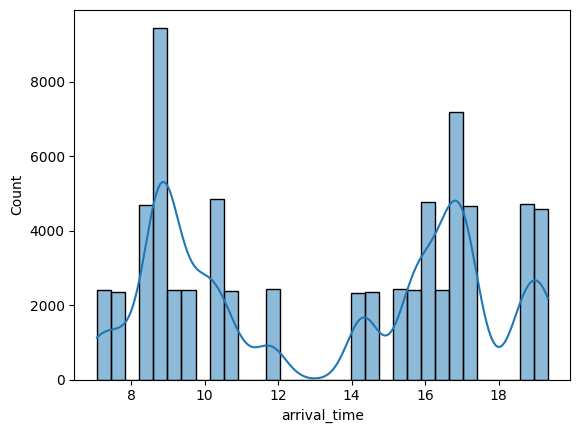

In [16]:
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=binwidth)

Podemos aplicar la misma operación, pero en vez del horario de llegada, lo haremos para el horario de salida. Simplemente cambiamos a departure_time. y observamos el horario de salida.

<Axes: xlabel='departure_time', ylabel='Count'>

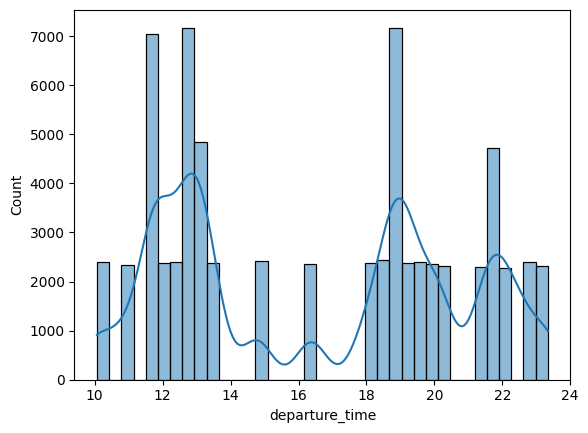

In [17]:
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos,x='departure_time',kde=True,binwidth=binwidth)

Y observamos el horario de salida. Si comparamos con el horario de llegada, notamos que la mayoría de las observaciones están alrededor de las 9 de la mañana, y el horario de salida alrededor de las 11, casi al mediodía, y después a la 1 de la tarde.
En la tarde, el horario de llegada es alrededor de las 5, y la salida es alrededor de las 7 de la noche. Vemos una distribución bimodal, con una moda aquí y otra al otro lado, mostrando una distribución muy semejante.
Lo que nos interesa es el gráfico de distribución de la variable respuesta, que son los retrasos en los vuelos

 Para ello, generaremos una variable que llamaremos atraso_promedio. Tomaremos de nuestros datos directamente la variable de ley, que es el promedio en minutos (mean).
 También calcularemos la mediana del atraso con atraso_mediana=datos['delay'].median().

In [18]:
atraso_promedio = datos['delay'].mean()
atraso_promedio = datos['delay'].median()

 Almacenamos nuestro atraso promedio y nuestra mediana, y con estos valores generaremos dos gráficos: un box plot, que es el gráfico de caja que nos permite ver el rango intercuartil, la mediana, el valor mínimo, el valor máximo, o si existen observaciones atípicas, y también un histograma que nos permita observar cómo están distribuidos los atrasos para ver si necesitamos hacer algún ajuste.
 Antes de iniciar con el modelado, es importante que nuestros datos estén distribuidos lo más cercano posible a una distribución normal para el atraso. Esto nos permitirá avanzar directamente al modelado con machine learning.

Vamos a crear nuestro lienzo: fig será la figura y axis los ejes. Utilizaremos plt.subplots para crear dos gráficas lado a lado y establecer un tamaño de figura con figsize=(9, 4), es decir, 9 pulgadas de ancho por 4 de altura.

Primero, crearemos nuestro box plot con sns.boxplot. Utilizaremos nuestro conjunto de datos y colocaremos en el eje vertical los retrasos. Este gráfico quedará al lado izquierdo (ax[0]). Le asignaremos un título con ax[0].set_title("Box Plot").

También añadiremos una línea horizontal para indicar el promedio con ax[0].axhline, estableciendo el color en rojo (color='r') y estilo de línea en trazos (linestyle='--').Colocamos un label =promedio. Añadiremos una leyenda con ax[0].legend().

A continuación, crearemos nuestro histograma con sns.histplot. Utilizaremos nuestros datos y colocaremos el retraso en el eje x. El eje ax será ax[1]. Queremos también nuestra curva de densidad (kde=True) y estableceremos el ancho de los bins con binwidth, calculado previamente para los atrasos. Añadiremos un label con plt.ylabel("Número de vuelos"). Quitaremos la cuadrícula con plt.grid(False) y asignaremos un título con ax[1].set_title("Histograma").

Generaremos dos líneas verticales, una para el promedio y otra para la mediana, utilizando ax[1].axvline. Cambiaremos hline por vline y y por x para las líneas verticales. El color será rojo para el promedio y ajustaremos para la mediana también. Añadiremos una leyenda con ax[1].legend(). Para evitar que los gráficos se solapen, utilizaremos plt.tight_layout(). Finalmente, mostraremos los gráficos con plt.show().

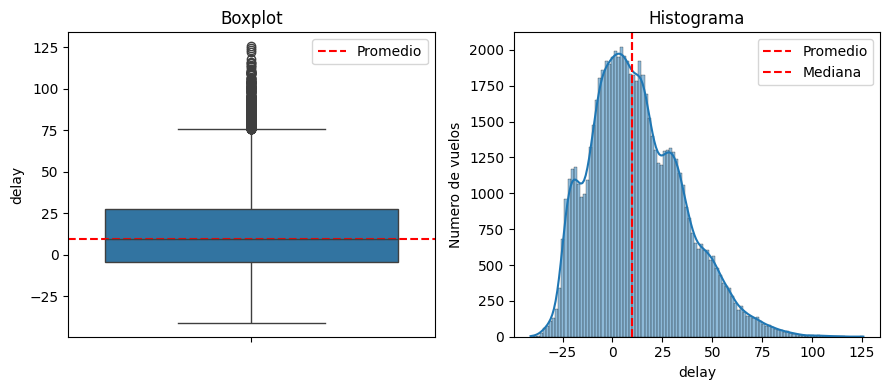

In [19]:
fig, ax= plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data=datos, y='delay',ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1],kde=True, binwidth=binwidth)
plt.ylabel('Numero de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Mediana')
ax[1].legend()


plt.tight_layout()

plt.show()


 A la izquierda, tendremos nuestro boxplot para observar la distribución, y a la derecha, el histograma, que también nos ayuda en esta observación. Un gráfico de violín, por ejemplo, nos permite ver la distribución y, en su interior, el boxplot. Sin embargo, debido a la dificultad de interpretación del gráfico de violín, optamos por el boxplot y el histograma.

En el boxplot, observamos que la mediana está alrededor de 10 minutos y el promedio alrededor de 12 minutos. Recordando nuestro método describe en pandas, la mediana era de aproximadamente 9 minutos y 45 segundos, y el promedio de 12 minutos y 30 segundos.

El valor mínimo era de 41 minutos de adelanto del vuelo y el máximo de 125 minutos. Estos 125 minutos son considerados outliers o observaciones atípicas. El valor máximo que realmente consideramos en el boxplot es de alrededor de 75 minutos de atraso, y el mínimo de 44 minutos, que fue el adelanto del vuelo.

La distribución en el histograma muestra que el promedio y la mediana están muy cercanos, lo que indica una distribución cercana a la normal.

#**Feature Engineering**

###**Creando nuevas columnas**

Ahora procederemos a generar nuevas features o nuevos atributos, lo que se conoce como feature engineering (ingeniería de atributos). Para ello, tomaremos nuestras columnas.



In [20]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

Recordemos lo que tenemos en nuestras columnas con el atributo columns de nuestro DataFrame. Observamos que tenemos la columna Day (día) y la columna Year, pero no tenemos una columna que tenga que ver con la fecha. Entonces, podríamos crear la columna Fecha a partir de estas dos columnas.

Si revisamos la parte superior, cuando estábamos haciendo el análisis de los metadatos, notamos que tanto Day como Year son enteros. Podemos aprovechar esta situación para hacer algunos ajustes.

Adicionalmente, observamos en la estadística descriptiva que el valor mínimo de día es cero, equivalente al primero de enero, y el máximo es 364, que sería el último día del año. En cuanto a los años, tenemos valores desde 2010 hasta 2022.

Lo que haremos es crear en nuestro DataFrame una columna que llamaremos date. Tomaremos el año y lo convertiremos en string con astype(str), y lo concatenaremos con un guion y también con el día.

Sin embargo, como comienza en el día cero, no podemos tratar este valor así; debemos comenzar a partir del día uno para poder utilizar un método de la biblioteca datetime que nos permita generar una fecha a partir de este formato.

Vamos a visualizar cómo se ve nuestro DataFrame con datos.head, mostrando solo dos filas. Notamos que ya tenemos la columna date. Deberíamos eliminar la columna datos, por lo que usaremos datos.drop. Aquí colocaremos columns y dentro de columns la columna datos. Con esto, ya hemos generado la nueva estructura de datos.

Ya tenemos la columna date directamente. Esto lo dejamos así; ni siquiera debíamos haberlo hecho de esta manera, pero fue necesario debido a un error con el nombre de la columna.
Ahora que la columna date está corregida, tenemos el año 2010 y el día 1, que corresponde al primer día del año. Ahora podemos tomar esta columna datos.date y utilizar el método de pandas to_datetime.

Colocamos datos, date y el formato, que será el siguiente: entre comillas %Y-%j. Este formato %Y-%j básicamente convierte el día 1 en el primero de enero y, por defecto, el día 365 en el 31 de diciembre.

Vamos a tomar los dos últimos valores de nuestro conjunto de datos con datos.tail para verificar que el último día del año es el 31 de diciembre de 2022.



In [21]:
datos['date'] = datos['year'].astype(str) +'-'+(datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'],format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


Ahora que tenemos nuestra columna date, avancemos un poco más y generemos una columna que nos permita determinar si es fin de semana o no. Es muy interesante; tomaremos nuestro DataFrame y crearemos una columna que llamaremos isWeekend. Ya tenemos isHoliday, ahora añadiremos isWeekend.

La columna isWeekend será igual a datos. De datos, tomaremos la columna date y, utilizando el método de datetime, aplicaremos weekday y isin. Esto verificará si el día de la semana está dentro del sexto y séptimo día.

Los días comienzan a partir de cero, por lo que el día cinco representa sábado y el seis representa domingo; el lunes sería el cero. Así, sabemos que estamos aislando sábado y domingo para identificar si es fin de semana.

Además, crearemos una variable llamada dayName en datos. Con el mismo método de datetime, utilizaremos day_name, que nos devuelve el nombre del día de la semana. Vamos a realizar un datos.head o datos.sample para tomar una muestra de cinco registros de nuestro conjunto de datos.





In [22]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
1527,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,101,2010,False,-16.533391,2010-04-12,False,Monday
43405,14,BZ,Airbus A330,schengen,ZQO,7.708301,11.708301,338,2017,False,-17.748150,2017-12-05,False,Tuesday
5201,16,MM,Airbus A320,non-schengen,CSF,17.041281,20.041281,346,2010,False,44.585126,2010-12-13,False,Monday
24046,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,143,2014,False,58.842437,2014-05-24,True,Saturday
44435,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,42,2018,False,52.168230,2018-02-12,False,Monday


Observamos que ya tenemos isWeekend, que quedará como booleano. Si es fin de semana, será verdadero para el día que fue sábado; perfecto, los otros días no son fin de semana. Los días son viernes (Friday), martes (Tuesday), miércoles (Wednesday), y la fecha está tal como la especificamos.

Hemos añadido nuevos atributos a partir únicamente del día y el año. Sin embargo, aún tenemos muchas variables categóricas, y para poder modelar con machine learning, es necesario que las codifiquemos.

###**¿qué es el feature engineering?**

El feature engineering es un concepto fundamental en el campo de la ciencia de datos y el aprendizaje automático, y desempeña un papel crucial en el proceso de desarrollo de modelos predictivos y analíticos. Esta técnica implica la creación, transformación y selección de variables, también conocidas como "features", a partir de los datos brutos disponibles, con el fin de mejorar el rendimiento de los modelos. Pero, ¿qué serían features?

**¿Qué son las features?**

Las features son las variables o atributos que un modelo de machine learning utiliza para hacer predicciones o clasificaciones. Representan la información que el modelo tiene a su disposición para aprender patrones en los datos. Por ejemplo, si estamos construyendo un modelo para predecir el precio de una casa, las features pueden incluir el número de habitaciones, la superficie en metros cuadrados, la ubicación geográfica, la proximidad a escuelas, entre otras.

**La importancia del Feature Engineering:**

1.Mejora el rendimiento del modelo: Elegir las features correctas y transformarlas adecuadamente puede resultar en modelos más precisos y eficientes. Features bien diseñadas pueden capturar información relevante y eliminar ruido en los datos.
2.Reduce la dimensionalidad: En conjuntos de datos con muchas features, la dimensionalidad de los datos puede convertirse en un problema. El feature engineering puede ayudar a reducir la cantidad de features, manteniendo solo aquellas que son realmente informativas para el modelo.

**Técnicas de Feature Engineering:**

Existen varias técnicas de feature engineering, incluyendo:

1.Creación de features: Esto implica la creación de nuevas features basadas en las existentes. Por ejemplo, combinar las features de superficie y valor de una propiedad para crear una feature que represente el valor por metro cuadrado de esa propiedad. O, si tienes datos de fecha y hora, puedes crear una nueva característica que represente el día de la semana. Esto puede ser útil porque tal vez haya patrones que ocurren en días específicos de la semana.
2.Transformación de features: Se pueden aplicar funciones matemáticas a las features existentes para hacerlas más adecuadas para el modelo. Ejemplos incluyen aplicar logaritmos o escalar valores para reducir la escala en la que se encuentra la variable.
3.Selección de features: No todas las features son igualmente importantes. La selección de features implica identificar y mantener solo las más relevantes para el problema en cuestión.

###**Feature encoding**

Los modelos de Machine Learning funcionan mejor cuando tenemos los datos codificados, es decir, variables numéricas. Sin embargo, en muchos casos nuestras variables no son numéricas, sino de otro tipo, como cadenas de caracteres o booleanas. Para abordar esto, vamos a utilizar nuevamente la información de nuestros metadatos para identificar qué tipo de columnas tenemos.

Tenemos, por ejemplo, la columna "Aerolínea", "Tipo de aeronave", "Espacio Schengen" y "Origen". Todas ellas son cadenas de caracteres que debemos codificar. También tenemos otras variables de tipo booleano, como IsWeekend y IsHoliday. Aunque "Schengen" es de tipo String (Objeto), solo tiene dos categorías: Schengen o no Schengen. Vamos a tomar estas variables inicialmente y realizar las modificaciones necesarias.

Primero, trabajaremos con las que tienen dos categorías. Para los datos de "Schengen", tomaremos nuestra columna y utilizaremos el método replace. Usaremos un diccionario donde la primera llave será "non Schengen" (cuando no sea espacio Schengen) y le asignaremos el valor 0. Cuando sea "Schengen", le asignaremos el valor 1.

Para las otras dos variables booleanas, simplemente copiaremos estos valores. Tomaremos IsHoliday, lo copiaremos y lo pegaremos en lugar de "non Schengen". Así, el valor False será reemplazado por 0 y True por 1. Aplicaremos el mismo diccionario para IsWeekend.

Luego, realizaremos un datos.sample para tomar únicamente tres muestras. Así, ya habremos cambiado IsHoliday, IsWeekend y "Schengen". Ahora tenemos variables numéricas.


El método replace será removido en una futura versión de Python. Como Python es un lenguaje de código abierto, se actualiza constantemente y pueden aparecer advertencias.

Si no deseamos ver estas advertencias, podemos importar la biblioteca warnings y utilizar warnings.filterwarnings con la opción "ignore". Esto ignorará las advertencias. Importamos la biblioteca, ejecutamos nuevamente y ya no veremos las advertencias sobre las modificaciones futuras del código.



In [23]:
import warnings

warnings.filterwarnings('ignore')

In [24]:

datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False: 0, True:1})
datos.sample(3)


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
29409,27,BZ,Airbus A320,1,AUZ,14.376052,16.376052,135,2015,0,-3.030966,2015-05-16,1,Saturday
7450,27,BZ,Airbus A320,1,AUZ,14.376052,16.376052,131,2011,0,-14.428663,2011-05-12,0,Thursday
59387,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,309,2020,0,-15.071720,2020-11-05,0,Thursday


Aún tenemos variables de tipo objeto como "Airline", "Aircraft", "Origin" y "DayName", que acabamos de crear. Vamos a crear una lista llamada categóricas y colocaremos estas variables: "Airline", "Aircraft Type", "Origin" (aeropuerto de origen) y "DayName".

Utilizaremos un método de pandas que nos permite codificar nuestras variables con ceros y unos de forma numérica: get_dummies. Usaremos pd.get_dummies y especificaremos nuestro conjunto de datos, las columnas que queremos codificar (columns=categóricas) y el tipo de dato (dtype) que será entero. Ejecutaremos esto sin almacenarlo para observar qué sucede.


In [25]:
categoricas = ['airline','aircraft_type','origin', 'day_name']

pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


El método toma las columnas y, por ejemplo, si el día es viernes, asigna 1 a ese registro y 0 al resto de los días de la semana. Generamos muchos atributos, pero no hay inconveniente, ya que el objetivo es codificar nuestras variables.



Copiamos este código y creamos una nueva variable llamada datos_codificados para almacenar nuestros dummies. Realizamos un datos_codificados.sample de cinco muestras.

In [26]:
datos_codificados = pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


Así, tenemos cinco muestras de nuestros datos codificados y todo está listo para avanzar a la próxima etapa, que es realizar una limpieza de nuestro conjunto de datos, ya que pueden haber variables que no son interesantes para el desarrollo de nuestro modelo.

###**Limpiando los datos**

Ya tenemos un DataFrame codificado, con todas nuestras variables casi listas para introducirlas al modelo de Machine Learning (aprendizaje automático).

Sin embargo, es necesario que analicemos un poco mejor las variables que estamos utilizando, porque hay casos en los cuales las variables pueden tener comportamientos muy semejantes y pueden acabar perjudicando nuestro modelado.

¿A qué nos referimos con ello? Notamos que tanto el horario de llegada como el horario de salida tenían un comportamiento muy semejante. Si observamos la gráfica en la parte superior, cuando estábamos viendo la distribución de estos horarios, por ejemplo, el horario de llegada presentaba una distribución bimodal, y el horario de salida, DepartureTime, de la misma forma. Entonces, se parecen mucho, pero matemáticamente, ¿cómo podemos validar lo que estamos diciendo?

Podemos utilizar un método de pandas, que es el método de las correlaciones. Vamos a tomar nuestras variables ArrivalTime y DepartureTime. Básicamente, un mapa de correlación nos dice cómo se relaciona una variable, o un número definido de variables, con respecto a otras.

La correlación puede ser positiva o negativa, y varía de menos uno a uno. De cero a menos uno tenemos las correlaciones negativas. ¿Qué quiere decir esto? Que la variación es inversamente proporcional. En otras palabras, mientras una variable crece, la otra decrece en la misma proporción.

Un ejemplo muy sencillo: mientras más se demora un vuelo en salir, menos satisfacción tienen los clientes. Entonces, hay una correlación negativa.

Ahora bien, si tomamos una correlación positiva, sería de cero a uno. Aplicándolo a nuestro caso, mientras menos tiempo se demora la aerolínea en preparar sus aeronaves, menos será la demora. Entonces, ambas variables se comportan de manera similar, creciendo o decreciendo juntas. Esa es la idea detrás de la correlación.



In [27]:
datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


Vamos a ver la correlación entre el horario de llegada y el horario de salida. Observamos que existe una correlación de casi 100%.

La correlación es muy fuerte. El hecho de incluir estas dos variables puede sesgar nuestro modelo. Debemos escoger solo una de ellas. Además, generamos nuevas variables.

Si revisamos nuevamente nuestros metadatos, notamos que estamos viendo datos codificados.

In [28]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   5 non-null      int64         
 1   schengen                    5 non-null      int64         
 2   arrival_time                5 non-null      float64       
 3   departure_time              5 non-null      float64       
 4   day                         5 non-null      int64         
 5   year                        5 non-null      int64         
 6   is_holiday                  5 non-null      int64         
 7   delay                       5 non-null      float64       
 8   date                        5 non-null      datetime64[ns]
 9   is_weekend                  5 non-null      int64         
 10  airline_BZ                  5 non-null      int64         
 11  airline_MM                  5 non-null      int64         
 12

En nuestros datos codificados, ya hemos creado todas estas variables a partir de las que eran cadenas de caracteres. Por ejemplo, esta variable Schengen... Perdón, ¿dónde están? Esta variable date, por ejemplo, la utilizamos para saber si era fin de semana o no. Entonces, ya no la necesitamos.

Tampoco necesitamos la variable year. Podemos removerlas, así como la de identificación, ya que el número de identificación no nos proporciona ningún patrón. No existe ningún patrón que podamos extraer de ahí, porque todas son identificaciones diferentes. Esto no tiene relación con comportamientos para este modelo en particular.

Considerando esto, vamos a proceder de la siguiente manera. Crearemos una variable que llamaremos df. Tomaremos los datos codificados y realizaremos un drop, especificando entre paréntesis las columnas que vamos a eliminar. Entonces, escribimos columns= y colocamos en una lista las columnas a eliminar.

La primera columna será flightID. Eliminaremos DepartureTime, ya que tanto el horario de llegada como el de salida tienen una correlación muy alta. Escogemos una de ellas, el horario de salida, DepartureTime. También eliminaremos día, año y fecha (date). ¿Por qué las eliminamos? Porque no estamos realizando un análisis temporal con series temporales. Simplemente estamos previendo atrasos considerando las demás variables.

De los datos codificados, eliminamos estas variables y tomamos una muestra con df.sample. Esta vez, tomaremos 10 muestras.

In [29]:
df = datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])
df.sample(5)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Observamos que tenemos estas 5 muestras y todas nuestras variables completamente codificadas.

Con nuestro DataFrame completamente tratado, con nuestras features creadas y codificadas, procederemos a iniciar nuestro modelado con Machine Learning.

#**Selección y validación del modelo**

###**Definiendo una baseline**

Para ello, debemos establecer en primer lugar una línea base o referencia, conocida como Baseline. Esta Baseline será nuestro punto de partida y compararemos todo nuestro modelado con ella, ya que la idea es mejorarla.

Nos apoyaremos en gran medida en la biblioteca Scikit-Learn. Esta biblioteca es muy útil para trabajar con Machine Learning. Estamos trabajando con regresión, y existen diversos tipos de modelos de regresión que podemos utilizar, así como clasificación, clustering (agrupamiento) y selección de modelos.

La documentación de Scikit-Learn es muy completa, y recomendamos consultarla.

Como mencionamos, vamos a crear una Baseline. Para esta Baseline, no es necesario que sea el mejor modelo; podemos crear un modelo dummy (básico), que no generaliza muy bien.

Para ello, utilizaremos DummyRegressor de sklearn.dummy. Este regresor realiza la regresión de manera básica. También utilizaremos train_test_split de sklearn.model_selection, que nos permitirá separar nuestro DataFrame en datos de prueba y datos de entrenamiento.

En la misma celda, definiremos X como nuestras variables independientes, tomando de nuestro DataFrame todas las variables excepto la columna delay, ya que delay es nuestra variable de respuesta. Así, X contendrá todas las columnas excepto delay, y Y será precisamente nuestra variable delay.

Procederemos a segregar nuestro modelo con X_train, X_test, Y_train y Y_test, en ese orden, utilizando train_test_split. Estableceremos un tamaño de muestra de prueba (test_size) de 0.3, lo que significa que probaremos con el 30% de nuestro DataFrame.

Para poder reproducir nuestro modelado, debemos establecer un estado de aleatoriedad, ya que todos estos modelos son pseudoaleatorios. Utilizaremos random_state=42, pero puedes elegir el número que desees para generar este estado de pseudoaleatoriedad.

Crearemos nuestro modelo de Baseline, al que llamaremos baseline, utilizando DummyRegressor. Ajustaremos nuestros datos a este modelo con baseline.fit, utilizando X_train y Y_train.

In [30]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X = df.drop(['delay'],axis=1)
y = df['delay']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train,y_train)   # entrenamos el modelo


DummyRegressor()

Una vez entrenado nuestro modelo, procederemos a evaluarlo utilizando métricas.

Importaremos de sklearn.metrics las métricas mean_squared_error, mean_absolute_error y r2_score. Estas métricas nos permitirán medir el error de nuestro modelo. El coeficiente de determinación (r2_score) es especialmente importante, ya que indica qué tanto las variables independientes logran explicar la variable de respuesta.

El coeficiente r2, que varia de 0 a 1, quiere decir que cuanto más cercano a 1 el modelo está generalizando muy bien el comportamiento de la variable de respuesta, mientras el coeficiente de determinación tienda a 0, el modelo no está explicando absolutamente nada de la variable de respuesta.

Vamos a crear nuestra variable yPredDummy. Aquí simplemente tomamos baseline.predict y colocamos X_test. Hacemos esa predicción y definimos una función que llamaremos calcularRegresión, la cual recibirá los valores reales y los valores predichos.

Dentro de nuestra función, colocaremos el rootMeanSquaredError, utilizando Y_test y la y predicha por nuestro modelo. No queremos que lo ponga al cuadrado, sino que deje el valor sin elevar al cuadrado para que siempre quede como un número positivo.

También tenemos el error absoluto promedio, mAe, que sería mean_absolute_error con los mismos parámetros: Y_test y y predicha. Además, queremos el R2, que sería r2_score con Y_test y y predicha.

Vamos a crear un diccionario llamado métricas y colocaremos primero RmSe con su valor, luego mAe con su valor, y finalmente R2 con su valor. Estos números se devolverán con varias cifras decimales, así que les daremos un tratamiento especial, limitándolos a 4 cifras decimales.

Devolvemos nuestras métricas.

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)    # predecimos

def calcular_regresion(y_test,y_pred):                  # creamos la función
  rmse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
        'RMSE':round(rmse**(1/2),4),
        'MAE': round(mae,4),
        'R2':  round(r2,4),
  }

  return metricas


Ya creamos nuestra función, ahora generamos una variable llamada resultadosBaseLine, que será calcularRegresión con Y_test y el valor de nuestro DummyRegressor. Visualizamos resultadosBaseLine.

Observamos un error: "Squared got unexpected argument squared". Revisamos la documentación y vemos que la opción squared ya no está disponible. Reinstanciamos nuestra función y corregimos elevando a un medio directamente.

Esto es porque necesitamos que no muestre los minutos al cuadrado. Refinamos esto colocando la multiplicación internamente para sacar la raíz cuadrada en este punto.

In [32]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 12.3425, 'MAE': 11.7342, 'R2': -0.1064}

Ejecutamos nuevamente. El error cuadrado medio es de 12.34 minutos, el error absoluto medio es de 11.73 minutos, y el coeficiente de determinación es de cero. Este modelo no está generalizando de manera correcta.

Esta es nuestra línea base(baseline).

###**Métricas utilizadas en regresión**

Algunas de las métricas más comunes para evaluar modelos de regresión, como RMSE, MAE y R2. Junto con estas métricas, existen diversas otras que pueden ser bastante útiles durante la evaluación de un modelo de regresión. A continuación, podrás encontrar algunas de las métricas más utilizadas y sus traducciones en español:

*Mean squared error - MSE (Error
Cuadrático Medio);
*Mean absolute error - MAE (Error Absoluto Medio);
*Root Mean Squared Error - RMSE (Raíz Cuadrada del Error Cuadrático Medio);
*Mean Squared Logarithmic Error - MSLE (Error Logarítmico Cuadrático Medio); y
*Mean Absolute Percentage Error - MAPE (Porcentaje del Error Absoluto Medio).

**Mean squared error - MSE**

El Mean Squared Error (MSE), o Error Cuadrático Medio, es una métrica ampliamente utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. Esta métrica calcula la media de los errores cuadrados, donde cada error es la diferencia entre el valor previsto por el modelo y el valor real. La elevación al cuadrado da mayor peso a los errores mayores, lo que puede ser útil cuando esos errores son particularmente indeseables.

En esta fórmula, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSE se calcula tomando la diferencia entre los valores reales y los valores predichos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

Para evaluar la calidad de un modelo usando el MSE, cuanto más cerca de 0 esté el valor del MSE, mejor estará el modelo en predecir los valores deseados. Esto se debe a que un MSE de 0 indica que no hay diferencia entre los valores previstos y los valores reales, es decir, el modelo está haciendo predicciones perfectas.

Aunque el MSE es una métrica útil, vale la pena mencionar que tiene la desventaja de dar más peso a los outliers debido al cuadrado de cada término. Esto puede ser indeseable en muchos casos, llevando a los investigadores a usar alternativas, como el error absoluto medio (MAE).

La documentación de scikit-learn tiene información que ofrece más detalles sobre esta métrica en "mean squared error" https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

**Mean absolute error - MAE**

El Error Absoluto Medio (MAE) es una medida de error común utilizada en modelos de regresión. Se calcula tomando la media de los valores absolutos de los errores. En otras palabras, para cada punto de datos, primero calculamos el error (la diferencia entre el valor predicho y el valor real), tomamos el valor absoluto de ese error (para asegurar que todos los errores sean positivos), y luego calculamos la media de todos estos errores absolutos.

En esta ecuación, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MAE se calcula tomando la diferencia absoluta entre los valores reales y los valores predichos para todas las observaciones, sumando estas diferencias absolutas y, a continuación, dividiendo por el número de observaciones "n".

El MAE es similar a la Métrica del Error Cuadrático Medio (MSE), pero en lugar de elevar los errores al cuadrado, simplemente toma el valor absoluto de los errores. Esto hace que el MAE sea menos sensible a outliers que el MSE, ya que los errores grandes no se amplifican por el cuadrado.

Al evaluar modelos de regresión con el MAE, un valor menor indica un modelo más preciso. En otras palabras, cuanto menor sea el MAE, mejor será el modelo en predecir el valor correcto para nuevos datos. El MAE tiene un límite inferior de 0, que indica un modelo perfecto (es decir, todas las predicciones son exactas).

Cabe destacar que, aunque el MAE es una métrica útil, no debe ser la única métrica utilizada para evaluar el rendimiento de un modelo de regresión. Otras métricas, como el MSE, la Raíz Cuadrada del Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R2), también deben ser consideradas para obtener una evaluación completa de la capacidad de un modelo para hacer predicciones precisas.

La documentación de scikit-learn ofrece más detalles sobre esta métrica en
"Mae" https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

**Root Mean Squared Error - RMSE**

La Raíz Cuadrada del Error Cuadrático Medio (RMSE) es una métrica de evaluación comúnmente utilizada en modelos de regresión, que es esencialmente la raíz cuadrada del MSE (Error Cuadrático Medio). El RMSE se calcula tomando la raíz cuadrada de la media de los errores cuadrados, que son las diferencias entre los valores previstos y los valores reales, elevadas al cuadrado.

Donde:

* n es el número de muestras;
* Ŷ_j es la predicción del modelo para la muestra j;
* Y_j es el valor real para la muestra j.

El RMSE es una medida de la dispersión de los residuos (errores de predicción) y, al igual que el MSE, penaliza los errores mayores de forma más severa que los errores menores, debido al hecho de elevar al cuadrado las diferencias. Esto lo hace particularmente sensible a grandes errores.

Un valor menor de RMSE indica un mejor ajuste del modelo a los datos, es decir, las predicciones del modelo están más cerca de los valores reales. Es importante resaltar que, aunque el RMSE es una métrica útil, no debe ser la única métrica considerada al evaluar la calidad de un modelo de regresión.

Puedes acceder a la documentación de scikit-learn para saber más sobre esta métrica: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

**Mean Squared Logarithmic Error - MSLE**

El Error Logarítmico Cuadrático Medio es una métrica de evaluación utilizada en problemas de predicción donde la escala de los valores objetivo o de las predicciones varía significativamente y los errores relativos son más importantes que los errores absolutos. El MSLE mide el error cuadrático medio entre los logaritmos naturales de los valores reales y los logaritmos naturales de las predicciones.

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSLE se calcula tomando el logaritmo natural de los valores reales y predichos sumados a 1, calculando la diferencia entre estos logaritmos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

El principal punto de enfoque de esta métrica es medir la diferencia relativa entre los valores esperados y los predichos por el modelo, es decir, verifica la diferencia porcentual entre ellos. De modo que, pequeñas diferencias entre valores pequeños son tratadas igualmente a grandes diferencias entre valores grandes.

Esta métrica se utiliza más cuando no deseamos que grandes errores sean significativamente más penalizados que errores pequeños.

Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error

**Mean Absolute Percentage Error - MAPE**

El Mean Absolute Percentage Error es muy similar al Mean Absolute Error - MAE, con la diferencia de que mide la precisión como un porcentaje y puede ser calculado como el porcentaje del MAE para cada muestra. El MAPE se utiliza mucho en problemas de regresión, ya que proporciona una interpretación bastante intuitiva sobre el error relativo.

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación, "ŷ_i" es el valor predicho para la i-ésima observación, y el MAPE se calcula como la media de los porcentajes absolutos de las diferencias entre los valores reales y los valores predichos en relación con los valores reales. El resultado se multiplica por 100% para expresar el error como un porcentaje.

El MAPE se utiliza frecuentemente como una métrica de error para evaluar la precisión de las predicciones en problemas de predicción y se expresa como un porcentaje del error medio absoluto en relación con los valores reales. Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error


###**Entrenando con bosques aleatorios**

Ya hemos establecido una línea base (Baseline), utilizando un DummyRegressor. La idea era que generalizara de la manera menos inteligente posible para que pudiéramos mejorar nuestro modelo. Esto es completamente válido y normal al trabajar con Machine Learning: siempre establecemos una línea base y, a partir de ahí, comenzamos a mejorar.

Para nuestro problema, utilizaremos bosques aleatorios, conocidos como Random Forest, que es un modelo más robusto y con el cual mejoraremos considerablemente el resultado de nuestra línea base.

Importamos el RandomForestRegressor de sklearn.ensemble.

Una vez que tenemos nuestro regresor de Random Forest, lo siguiente es crear nuestro modelo. Lo llamaremos simplemente modelo y utilizaremos el RandomForestRegressor. Este regresor tiene un parámetro que debemos ajustar, que es la profundidad máxima.

Inicialmente, estableceremos este parámetro en 5. También definiremos un estado de aleatoriedad para poder reproducir nuestro modelo, utilizando una semilla, que en este caso será 42. Es importante mantener este mismo número de estado de pseudoaleatoriedad a lo largo del desarrollo.

Con nuestro modelo listo, procederemos a ajustar nuestros datos con fit(xTrain, yTrain). Después de esto, realizaremos la predicción con yPred = modelo.predict(xTest).

Para evaluar el resultado, calcularemos la regresión con calcularRegresión, que recibe yTest y yPred. Esto nos permitirá ver los resultados de nuestro modelo de Random Forest. Este modelo crea varios árboles de decisión y encuentra la mejor combinación para obtener el mejor resultado al realizar una previsión, en este caso, nuestra variable de retrasos.



In [33]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train,y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 7.6985, 'MAE': 7.6981, 'R2': 0.5696}

Observamos que nuestro modelo generalizó mucho mejor, con un Root Mean Square Error de 7 minutos, mejorando de 12 minutos a 7 minutos. El error medio absoluto pasó de 12 minutos a 7.6 minutos, y el coeficiente de determinación es de casi 50%. Todo esto se logró estableciendo una profundidad de 5 en nuestro modelo.

Para visualizar estos resultados de manera gráfica, utilizaremos una biblioteca interesante llamada Yellowbrick. Vamos a ver un Error Plot que nos permite observar gráficamente cómo está generalizando nuestro modelo. Copiaremos un fragmento de código de un Quick Method y lo refinaremos lógicamente para nuestros propósitos.
Observamos que nuestro modelo generalizó mucho mejor, con un Root Mean Square Error de 13 minutos, mejorando de 23 minutos a 13 minutos. El error medio absoluto pasó de 18 minutos a 11 minutos, y el coeficiente de determinación es de casi 65%. Todo esto se logró estableciendo una profundidad de 5 en nuestro modelo.



Para visualizar estos resultados de manera gráfica, utilizaremos una biblioteca interesante llamada Yellowbrick. Vamos a ver un Error Plot que nos permite observar gráficamente cómo está generalizando nuestro modelo. Copiaremos un fragmento de código de un Quick Method y lo refinaremos lógicamente para nuestros propósitos.

Entonces, no necesitamos el modelo lazo, lo eliminamos. El Train Test Split tampoco es necesario, así que lo quitamos. El Data Set también lo eliminamos, ya que no lo necesitamos.

Solo requerimos la predicción del error, por lo que no necesitamos hacer la división aquí de X-Train, ni cargar el Data Set, ni el modelo. Simplemente eliminamos todo esto. Aquí sería el modelo directamente.

Procedemos a graficar, podemos poner un punto y coma aquí, y ejecutamos nuestra celda. Esto nos permitirá visualizar cómo está generalizando nuestro modelo.

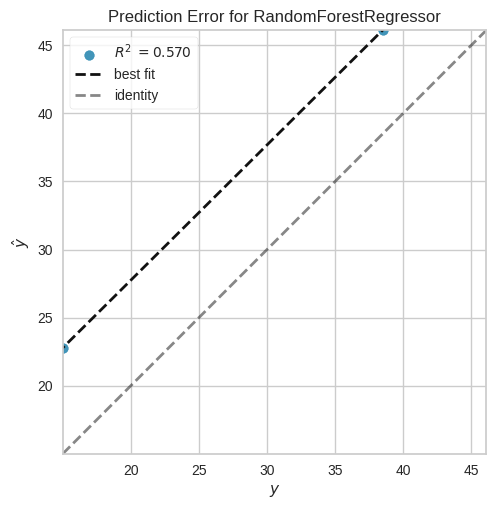

In [34]:
from yellowbrick.regressor import prediction_error


visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

La predicción de error para este regresor de Random Forest muestra que el mejor ajuste está representado por la línea negra. La línea de identidad, que es nuestra gráfica de identidad del modelo, es la que se muestra aquí.

El mejor ajuste es lo que debemos alcanzar, y por eso obtenemos este resultado en R² con las características del modelo. La recta que mejor se ajusta a nuestro conjunto de datos es la que está en negro más oscuro, mientras que la que aparece en gris es la obtenida con nuestro modelo al pasar el parámetro MaxDepth igual a 5. Es una forma interesante de visualizar.

Además, tenemos un gráfico que nos permite ver los residuos, es decir, cuánto realmente está generalizando nuestro modelo. Vamos a utilizar de Yellowbrick este análisis de residuos. En la documentación, encontramos que esta gráfica se obtiene a partir de un snippet.

Vamos a revisar la documentación para ver el análisis que genera y, de la misma forma, utilizaremos el Quick Method.

Copiamos todas estas líneas de código y las pegamos. No necesitamos el Random Forest ni el T-Split, así que los eliminamos. Solo necesitamos el gráfico de residuos, y aquí también eliminamos estos códigos innecesarios. La visualización no será con RandomForestRegressor, sino con el modelo. Perfecto, le pasamos estos parámetros y ejecutamos nuestra celda.

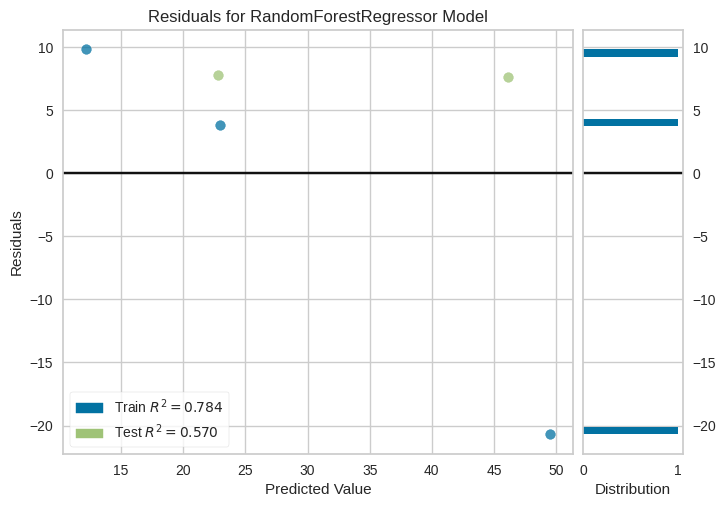

In [35]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

Los residuos son la diferencia entre mis observaciones, los datos de entrenamiento, y la línea trazada por mi modelo.

Esta línea se traza de manera que minimizara la distancia de cada observación hacia cada una de las líneas, y esos son los residuos. Queremos que los datos de prueba tengan un comportamiento lo más similar posible a los obtenidos con el entrenamiento.

Observamos que el comportamiento de prueba fue muy cercano al de entrenamiento. La idea de observar esta distribución es que, aunque el coeficiente de determinación del entrenamiento fue del 64%, al probarlo, llegó casi al 65%.

Esto indica que el modelo está generalizando relativamente bien sin mejoras adicionales, ajustes de hiperparámetros o refinamientos. Sin embargo, no es suficiente.

 Es necesario aplicar otras técnicas, como la validación cruzada, que nos permita tomar diversas muestras de nuestro conjunto de datos para verificar si el comportamiento se mantiene a lo largo de las distintas muestras o si el resultado fue producto de la aleatoriedad del modelo.

###**Realizando cross validation**

Hemos mencionado que realizamos un modelado utilizando bosques aleatorios, pero únicamente empleamos un mismo conjunto de datos para entrenamiento y otro para prueba.

Por lo tanto, no sabemos si nuestro modelo está generalizando adecuadamente con cualquier combinación de datos de entrenamiento y prueba. La idea de realizar una validación cruzada es precisamente dividir nuestro conjunto de datos en varias partes y tomar diferentes secciones de este conjunto para entrenar y probar.

Para ello, contamos con dos recursos de Scikit-Learn que son KFold. En la documentación, el recurso se llama KFold y se encuentra en Model Selection.

Es un recurso muy sencillo, y en la guía del usuario se muestra cómo funciona. En la documentación, se explica que se toma todo el conjunto de datos y, por ejemplo, para el caso que tenemos aquí, se utiliza el 80% para entrenamiento (representado en verde) y el 20% para prueba (representado en azul).

Se realizarán cinco divisiones, dependiendo de la cantidad de folds que estimemos. Para este caso, son cinco, y el primer doblez será para prueba, mientras que el restante será para entrenamiento.

En el segundo caso, el primer conjunto de datos, el 20%, será para entrenamiento, el siguiente para prueba y el otro 60% para entrenamiento. En el tercer caso, el 40% inicial será para entrenamiento, el otro 20% para prueba y el 40% final para entrenamiento, y así sucesivamente.

De esta manera, realizaremos diversas combinaciones tanto para entrenar como para validar nuestro modelo.


Entonces, es muy sencillo. Utilizamos la clase KFold de Model Selection de Scikit-Learn. Vamos a copiar este código y pegarlo. Importamos directamente de este código: from sklearn.model_selection import KFold.

Vamos a copiar también este trecho de código y eliminar la parte final porque simplemente estamos importando. Lo pegamos en la parte inferior y quitamos el asterisco. Queremos que haga todas las combinaciones posibles, así que lo configuramos como True, con 5 divisiones y un estado de pseudoaleatoriedad para mantener consistencia, dejándolo en 42. Este será nuestro CV.

Ahora necesitamos los resultados de CV. Creamos la variable CVResults y aquí es cuando debemos hacer una validación cruzada. Utilizamos cross_validate. Consultamos la documentación para entender cómo es este método o módulo.

También pertenece a Model Selection y observamos que tiene un estimador, una X, un valor de Y, un scoring (muy importante para validar) y una validación cruzada.

Copiamos hasta aquí, ya que no necesitamos el resto de los parámetros en este momento, y lo pegamos. Nuestro estimador será directamente nuestro modelo, que es RandomForestRegressor, X_train, y Y será Y_train. No necesitamos los groups. El scoring sí lo necesitamos y lo definiremos. La validación cruzada será cv igual a CV.

Definimos nuestro scoring generando un diccionario, similar al que manejamos al inicio, pero aquí cambia porque los recursos de validación cruzada de sklearn requieren que utilicemos una función de utilidad. Una función de utilidad significa que mientras mayor sea el error calculado, mejor será nuestro modelo.

En los puntajes anteriores, utilizábamos funciones de costo, donde mientras menor el error, mejor el modelo. Aquí queremos maximizar el error, por eso utilizamos la versión negativa: neg_root_mean_squared_error.

Si copiamos este tipo de función y la observamos en la documentación, aparece en los métodos de validación cruzada. Al abrir la documentación, encontramos los name scorers en string.

Por ejemplo, las métricas cuya distancia entre el modelo y los datos, como metrics mean squared error, están disponibles como neg_mean_squared_error, que es lo que mencionábamos, porque son funciones de utilidad. Aquí está: neg_mean_squared_error para regresión, no para clasificación y clustering.

Root mean squared error sería neg_root_mean_squared_error, mean squared error sería neg_mean_squared_error, y mean absolute error sería neg_mean_absolute_error, que ya aprovechamos y pegamos. Mean absolute error será precisamente neg_mean_absolute_error y el R cuadrado será r2.

Con nuestro scoring definido, podemos visualizar nuestros resultados. Este proceso demorará un poco porque ejecutará todas las combinaciones posibles y calculará las métricas: root mean squared error, mean absolute error y el coeficiente de determinación.

Al finalizar la ejecución, veremos el tiempo que tomó calcular los resultados con cada combinación. Una vez obtenidos los resultados, no nos enfocaremos en el tiempo que tomó ajustar el modelo ni en los puntajes, sino en los resultados.

La idea es que haya consistencia en esos resultados.

In [38]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
      'RSE':'neg_root_mean_squared_error',
      'MAE':'neg_mean_absolute_error',
      'R2':'r2'
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_results



{'fit_time': array([0.19299579, 0.1851368 , 0.21056318]),
 'score_time': array([0.02105927, 0.02118421, 0.02986836]),
 'test_RSE': array([-36.66650667, -57.60006173, -12.41141443]),
 'test_MAE': array([-36.66650667, -57.60006173, -12.41141443]),
 'test_R2': array([nan, nan, nan])}

Observamos que para el root mean squared error, el valor fue de -13.76, -13.86, -13.96, -13.85, -13.98, mostrando una variación leve pero consistente. En nuestro modelo, fue de 13.74, lo que indica consistencia y un buen resultado.

Para el error promedio absoluto, los valores fueron -11, -11.13, -11.20, -11.14, -11.25, y en nuestro modelo fue -11.02, lo cual es excelente. Por último, el coeficiente de determinación fue 64.5%, 63.74%, 63.5%, 64% y 63.4%, mientras que en nuestro modelo fue 64.77%. Esto indica que realizando esta validación cruzada, realmente hay consistencia en nuestros resultados.

Hasta aquí no hemos ajustado ningún hiperparámetro. Lo único que hicimos fue darle una profundidad a nuestro estimador, pero no más. Nuestro estimador tiene muchos más hiperparámetros.

###**Feature importances**

Ya tenemos un modelo de Machine Learning casi listo, pero podemos refinarlo o mejorarlo aún más. En este punto, si tomamos nuestro modelo, vamos a tomar nuestro DataFrame directamente y vamos a ver la cantidad de columnas que estamos utilizando.



In [39]:
df.columns

Index(['schengen', 'arrival_time', 'is_holiday', 'delay', 'is_weekend',
       'airline_BZ', 'airline_MM', 'airline_YE', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Boeing 737',
       'aircraft_type_Boeing 777', 'aircraft_type_Boeing 787',
       'aircraft_type_Embraer E175', 'origin_AUZ', 'origin_CNU', 'origin_CSF',
       'origin_EMM', 'origin_FJB', 'origin_MWL', 'origin_PUA', 'origin_TCY',
       'origin_TZF', 'origin_ZQO', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')

In [41]:
len(df.columns)

31

¿Será que todas estas columnas son importantes para nuestro modelo? Vamos a ver con cuántos atributos estamos trabajando. Antes de ajustar los hiperparámetros, tenemos 31 atributos, pero ¿serán esos 31 atributos relevantes?

Para saberlo, vamos a tomar nuestro modelo y consultar el atributo feature_importances_, que nos devuelve un NumPy array con el porcentaje de importancia de cada feature (característica). Pero, ¿cuál es cuál? A partir de aquí, podemos crear un DataFrame que llamaremos FeatureImportances.



In [44]:
importances = modelo.feature_importances_

Será un Pandas DataFrame, y en este Pandas DataFrame colocaremos un diccionario en el cual crearemos una llave que llamaremos Features, que serán las columnas de nuestro DataFrame de entrenamiento, y otra que será Importances, que representará nuestras importancias.

Almacenaremos esto en una variable que llamaremos Importances(en la celda anterior). Lo almacenamos y lo haremos más legible. Multiplicamos Importances por 100 y redondeamos este valor a dos decimales. Ya tenemos nuestro DataFrame, y vamos a hacer un sort_values por las importancias, con el parámetro ascending igual a False, para que quede en orden descendente.
Tenemos nuestro Pandas DataFrame, colocamos el diccionario con la primera llave, y será la importancia redondeada a dos decimales. Estaba acusando un error inexistente en feature_importances_. Vamos a ver cómo está la importancia de nuestras features.

In [45]:
feature_importances = pd.DataFrame({'Features':X.columns,'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances

,Features,Importances
1,arrival_time,20.13
4,airline_BZ,18.23
16,origin_EMM,15.29
8,aircraft_type_Airbus A330,10.85
20,origin_TCY,8.04
21,origin_TZF,7.32
5,airline_MM,6.99
0,schengen,6.01
7,aircraft_type_Airbus A320,4.57
12,aircraft_type_Embraer E175,2.55


La importancia absoluta de cada una, es decir, la suma de todas las importancias, dará 100%. Están en orden descendente, y hay varios atributos que no aportan valor, sino que complican nuestro modelado, añadiendo ruido a nuestro modelo. La idea es seleccionar la mejor cantidad de features para nuestro modelo.

Por ejemplo, la aerolínea VZ representa el 53% de nuestro modelo. Si solo utilizamos la aerolínea VZ, nuestro R² ya indicará un 53%. Si tomamos VZ y East Holiday, ya tenemos el 67%, y así sucesivamente. Vamos mejorando, no propiamente el R², pero sí explicando hasta el 67% de nuestra variable de respuesta con las dos variables mencionadas.

Vamos a hacer algo más elaborado para que el análisis sea más lógico y fundamentado con nuestros datos. Crearemos un DataFrame llamado Resultados. Este DataFrame tendrá los índices que serán las métricas que estamos utilizando: RMSE, Mean Absolute Error (MAE) y R².





Ya creamos este DataFrame con los índices. Lo siguiente que queremos es ModelFeatures, que será nuestro regresor, que vamos a instanciar con cada cantidad de features que colocaremos. Vamos a usar diversas features. Haremos un Random Forest, todos con una profundidad máxima de 5 (max_depth) y con el mismo estado de aleatoriedad de 42.

Crearemos la lista de iteración, que es la cantidad de features. La llamaremos CTFeatures y la haremos a través de una List Comprehension.

Si i es diferente de 0, colocaremos 1, de lo contrario, haremos el rango directamente. La lista comenzará con 1 feature, luego 5 features, 10, 15, 20, 25 y 30. Eso es lo que hace esa List Comprehension.

Ahora, vamos a iterar. Utilizaremos un bucle for para recorrer i en CTFeatures. Aquí, asignaremos SelectedFeatures a FeatureImportances, que es el DataFrame que tomamos anteriormente. Vamos a seleccionar todos los valores hasta i.

En el primer caso, sería el primer valor; en el segundo caso, todos hasta el quinto valor, y así sucesivamente. Estas serán las Features seleccionadas.

Luego, extraeremos las variables seleccionadas. X_train_sel será igual a X_train de las variables seleccionadas, es decir, SelectedFeatures. Entrenaremos con estas variables seleccionadas. Para X_test_sel, tomaremos de X_test las variables seleccionadas, SelectedFeatures.

Después de esto, tomaremos nuestro modelo y utilizaremos ModelFeatures.fit para ajustar con X_train_sel y y_train. Luego, realizaremos la predicción y_pred con ModelFeatures.predict, utilizando X_test_sel seleccionada directamente. Las métricas se calcularán con la función calcular_regresion, que recibe y_test y y_pred.

Finalmente, en nuestro DataFrame de resultados, crearemos una columna con el número de Features i, y colocaremos en una lista el valor de las métricas, metricas.values.

De esta manera, generaremos nuestro DataFrame, que tomará tiempo debido a la iteración para cada una de las Features en orden de importancia. Realizaremos una iteración únicamente con Airline, luego con Airline, IsHoliday, AircraftType, hasta AircraftType, Embraer, y así sucesivamente.



In [46]:
[i if i != 0 else 1 for i in range(0,35,5)]

[1, 5, 10, 15, 20, 25, 30]

In [47]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_feature = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_feature:
  selected_feature = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_feature]
  X_test_sel = X_test[selected_feature]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados


,1,5,10,15,20,25,30
RMSE,10.0776,7.7085,6.0114,6.0114,6.6125,4.3122,3.5453
MAE,8.2639,6.6971,6.0108,6.0108,6.5930,4.3113,3.5453
R2,0.2624,0.5684,0.7376,0.7376,0.6824,0.8649,0.9087


La ejecución del código ha finalizado. Observamos que con una Feature, tenemos un coeficiente de determinación del 33%; con 5 Features, del 57%; con 10 Features, alcanza el 64%; y con 15 Features, llega al 64.76%, estabilizándose. No hay diferencia significativa al usar más de 15 Features.

Voy a modificar el código para cambiar la cantidad de Features, estableciendo un rango de 10 a 15. Ejecutaré de nuevo para observar el comportamiento entre 10 y 15, ya que la última mejora notable está en este rango. Ejecutaré nuevamente, y el proceso tomará algunos segundos.

In [48]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_feature = range(10,16)

for i in ct_feature:
  selected_feature = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_feature]
  X_test_sel = X_test[selected_feature]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados


,10,11,12,13,14,15
RMSE,6.0114,6.0927,7.7973,4.4057,6.2988,6.0114
MAE,6.0108,6.0905,7.7900,4.3072,6.2621,6.0108
R2,0.7376,0.7304,0.5584,0.8590,0.7119,0.7376


La ejecución ha finalizado nuevamente. Observamos que de 10 a 12 Features, hay una mejora gradual hasta llegar a 13 Features, donde se estabiliza. A partir de 13 Features, 14, 15, no hay mejora adicional.

Para el Root Mean Square Error, y también para el Mean Absolute Error, disminuyó de 11.03 a 11.02 minutos, mostrando una mejora. El coeficiente de determinación pasó de 64.74 a 64.76. Por lo tanto, tiene sentido dejarlo en 13 Features.

Para ello, tomaremos las líneas de código de las Features que seleccionaremos para entrenar. Copiaremos estas líneas, las pegaremos en esta celda y eliminaremos la indentación. SelectedFeatures será FeatureImportances hasta 13. X_selected_features será directamente X_selected_features para todo el conjunto de datos.

Ahora, tomamos nuestras Features seleccionadas y veremos cuáles fueron elegidas.

In [53]:
selected_feature = feature_importances['Features'].values[:13]
X_selected_features = X[selected_feature]
X_selected_features

,arrival_time,airline_BZ,origin_EMM,aircraft_type_Airbus A330,origin_TCY,origin_TZF,airline_MM,schengen,aircraft_type_Airbus A320,aircraft_type_Embraer E175,aircraft_type_Boeing 737,is_weekend,is_holiday
0,8.885071,0,0,0,1,0,1,0,1,0,0,0,0
1,8.939996,0,0,0,1,0,0,0,1,0,0,0,0
2,18.635384,1,0,0,0,1,0,1,0,1,0,0,0
3,15.967963,1,1,1,0,0,0,0,0,0,0,0,0
4,16.571894,1,0,1,0,0,0,0,0,0,0,0,0


 Aquí están las 13 que seleccionamos. Comienza con Airline, VZ y va hasta el tipo de aeronave, que sería el Boeing 737, y así sucesivamente. Estas son las Features más importantes.

 Procederemos a realizar la división de nuevo: X_train, X_test, y_train, y y_test, utilizando train_test_split, que recibirá nuestra X_selected_features.

 Copiaremos aquí, tomaremos y, y estableceremos un estado de aleatoriedad, random_state, igual a 42. De esta manera, ya tenemos nuestro conjunto de datos de entrenamiento y prueba

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_selected_features,y,random_state=42)


###**Optimizando hiperparámetros con GridSearchCV**

Hemos elegido las trece features (características) o atributos más importantes de nuestro modelo y ahora procederemos a ajustar los hiperparámetros. Si consultamos la documentación, veremos el estimador de Random Forest y el regresor. Observemos la cantidad de hiperparámetros que podemos ajustar: los estimadores, el criterio, la profundidad máxima, el mínimo de muestras para cada división, las mínimas muestras de hojas, la cantidad máxima de features, la cantidad máxima de nodos de hojas, entre otros.

Es una serie de hiperparámetros bastante numerosa. Sin embargo, no ajustaremos cada uno individualmente, ya que para ello existe un recurso muy importante que nos ofrece Scikit Learn, que es GridSearchCV con validación cruzada (cross-validation).

Este recurso nos permite realizar una búsqueda exhaustiva de los parámetros especificados para un estimador. Vamos a utilizar un diccionario con los parámetros que entrenaremos o usaremos para determinar cuál es el mejor estimador.

Tenemos nuestros param_grids y ahora importaremos la clase GridSearchCV. Copiaremos este código directamente, lo llevaremos a nuestro notebook y lo pegaremos. Eliminaremos la última parte del código que no necesitamos.



In [57]:
param_grid = {
              'max_depth':[5,10,15],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,4,6],
              'n_estimators':[100,150,200]
              }

Tenemos nuestros param_grids y ahora importaremos la clase GridSearchCV. Copiaremos este código directamente, lo llevaremos a nuestro notebook y lo pegaremos. Eliminaremos la última parte del código que no necesitamos.

Importaremos de la siguiente manera: from sklearn.model_selection import GridSearchCV. Ahora tomaremos nuestra validación cruzada como lo hicimos previamente, utilizando KFold. Especificaremos 5 divisiones, habilitaremos la mezcla con shuffle=True y también estableceremos un estado de aleatoriedad con random_state=42.

Ya tenemos nuestra validación cruzada y ahora pasamos al Model Grid, donde probaremos todos estos parámetros. Vamos a explicar esto más detenidamente.

Utilizaremos nuestro estimador, que será un RandomForestRegressor, con un estado de aleatoriedad (random_state) igual a 42, ya que los otros parámetros los pasaremos a través de param_grid.

El scoring que utilizaremos será únicamente el coeficiente de determinación, para evitar que la ejecución tome demasiado tiempo. Por lo tanto, usaremos solo R². El número de jobs no lo utilizaremos y la validación cruzada será directamente cv. Organizaremos mejor nuestros parámetros.

Por último, realizaremos el ajuste con model_grid.fit, utilizando X_train e y_train. Los parámetros que utilizaremos para nuestro modelo son: profundidad máxima de 5, 10 o 15; mínimo de muestras de hojas de 1, 2 y 3; mínimo de muestras para las divisiones de 2, 4, 6; y número de estimadores de 100, 150 y 200.

Estos parámetros se combinarán de diversas maneras, por ejemplo, 5 de profundidad con 1 de min_samples_leaf, con 2 de min_samples_split, con 100 de estimadores. Luego, 5 de max_depth con 2 aquí, con 2 aquí, con 150 aquí, y así sucesivamente. Habrá más de 60 combinaciones posibles, lo que resultará en una ejecución bastante prolongada.



In [59]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=3, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid=param_grid, scoring='r2',
                          cv=cv)

model_grid.fit(X_train,y_train)



GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

La ejecución ha terminado y tomó casi 20 minutos. Ahora tenemos nuestro mejor estimador. Para identificarlo, tomaremos directamente de model_grid los mejores parámetros.

In [60]:
model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

 Estos son: una profundidad de 10, con un mínimo muestreo de hojas de 3, un mínimo muestreo de divisiones de 2, y un número de estimadores de 200.


Procederemos a ver cómo predijo el modelo. y_pred_grid será igual a model_grid.predict, utilizando X_test. También revisaremos las métricas de inmediato. metricas_model_grid será igual a calcular_regresion, función que recibe y_test y y_pred. Visualizaremos las métricas.

In [61]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test,y_pred_grid)
metricas_model_grid


{'RMSE': 4.4057, 'MAE': 4.3072, 'R2': 0.859}

Básicamente, ya realizamos el entrenamiento, ahora simplemente hacemos la previsión con los mejores parámetros. Al comparar, notamos que el coeficiente de determinación superó el 67%, el error absoluto promedio disminuyó a 10.62 minutos, y el Root Mean Square Error a 13.2 minutos. Comparando con los valores anteriores, crearemos una nueva columna de resultados, metricas_model_grid, que será una lista con los valores directamente del modelo Grid.



In [62]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,6.0114,6.0927,7.7973,4.4057,6.2988,6.0114,4.4057
MAE,6.0108,6.0905,7.7900,4.3072,6.2621,6.0108,4.3072
R2,0.7376,0.7304,0.5584,0.8590,0.7119,0.7376,0.8590


Al visualizar los resultados, observamos que el modelo Grid mejoró el Root Mean Square Error de 13.74 minutos a 13.2 minutos, y el error absoluto medio de 11.02 minutos a 10.62 minutos, mostrando una mejora continua y notable. El coeficiente de determinación pasó del 64% al 67%, indicando que nuestro modelo realmente mejoró con estos parámetros y características.

###**hiperparámetros del RandomForestRegressor**

El RandomForestRegressor es un modelo de conjunto que combina varios árboles de decisión para hacer predicciones más robustas y precisas a través de la técnica de Bagging.

Los hiperparámetros son configuraciones que puedes ajustar para controlar el comportamiento del RandomForestRegressor. A continuación, se presenta una lista de los principales hiperparámetros:

1 - n_estimators:

*Este hiperparámetro especifica el número de árboles de decisión que se crearán en el bosque aleatorio. Cuanto mayor sea el número de estimadores, mayor será la capacidad del modelo para ajustarse a los datos. Sin embargo, un número muy alto puede llevar a un aumento en el tiempo de entrenamiento.

2 - criterion:

*El hiperparámetro criterion determina la función de medición de la calidad de una división durante la construcción de los árboles. Para regresión, el valor predeterminado es "mse" (Error Cuadrático Medio), que calcula la media de los cuadrados de los errores. Otra opción es "mae" (Error Absoluto Medio), que utiliza la media de los valores absolutos de los errores.

3 - max_depth:

*Este hiperparámetro controla la profundidad máxima de los árboles de decisión en el bosque. Limitar la profundidad puede ayudar a evitar el sobreajuste, ya que impide que los árboles se ajusten demasiado a los datos de entrenamiento y no puedan hacer buenas predicciones para nuevos datos.

4 - min_samples_split:

*El min_samples_split determina el número mínimo de muestras necesarias para dividir un nodo interno del árbol. Esto ayuda a controlar el crecimiento de los árboles y evita divisiones que llevan a nodos con pocas muestras.

5 - min_samples_leaf:

*Este hiperparámetro define el número mínimo de muestras requeridas en una hoja (nodo terminal) del árbol. Esto ayuda a controlar la granularidad del árbol y puede impedir que las hojas contengan muy pocas muestras.

6 - max_features:

*max_features especifica el número máximo de características a considerar al buscar la mejor división en cada nodo. Los valores comunes incluyen "auto" (sqrt(n_features)), "sqrt" (también sqrt(n_features)), "log2" (log2(n_features)), o un número entero que representa la cantidad exacta de características a considerar.

7 - random_state:

*Este hiperparámetro define una semilla para el generador de números aleatorios utilizado para crear el bosque aleatorio. Definir un valor fijo para random_state garantiza que el modelo sea reproducible.

8 - n_jobs:

*n_jobs especifica el número de núcleos de CPU a utilizar para el entrenamiento en paralelo. Si se define como -1, se utilizarán todos los núcleos disponibles.

Estos son algunos de los principales hiperparámetros del RandomForestRegressor en scikit-learn. La elección adecuada de estos hiperparámetros puede afectar significativamente el rendimiento y la capacidad de generalización del modelo para tareas de regresión. Para consultar los otros hiperparámetros faltantes, puedes consultar la https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

###**Serializando el modelo**

Ya tenemos un modelo de Machine Learning listo para serializar, es decir, para disponibilizarlo y que pueda ser consumido eventualmente por otros equipos.

Para realizar esta tarea, vamos a importar un módulo que nos permite llevar a cabo esta función, llamado pickle. Con pickle, abriremos un archivo binario utilizando open.

Le daremos un nombre, y generalmente, el modelo de Machine Learning que es el mejor y estará en producción lo llamamos Champion. Entonces, con open('Champion.pkl', 'wb'), colocamos el modo de escritura binaria.

A continuación, realizamos un pickle.dump. Hacemos el dump del modelo Grid, pero no solo del modelo Grid, sino del mejor estimador, que es best_estimator_.

No nos interesan los otros estimadores, por lo que queremos que este dump se realice directamente en el archivo. Si hay un error, puede ser porque no estamos utilizando el nombre correcto, como model_grid. Una vez corregido, hacemos el dump y después queremos que se imprima "Modelo Serializado con Éxito".

Sin embargo, puede ocurrir algún error, por lo que utilizamos una lógica de try-except. Si ocurre una excepción, la capturamos con Exception as e y mostramos el error con print("Se presentó un error al almacenar el modelo:", str(e)).

Ejecutamos el código y esperamos que nuestro modelo sea creado y serializado correctamente. Si todo sale bien, veremos el mensaje "Modelo Serializado con Éxito".

In [64]:
import pickle

try:
  with open('champion.plk','wb') as file:
    pickle.dump(model_grid.best_estimator_.file)
  print('Modelo Serializado con éxito')
except Exception as e:
   print('Se presento un error al almacenar el modelo:',str(e))

Se presento un error al almacenar el modelo: 'RandomForestRegressor' object has no attribute 'file'


Al revisar nuestro directorio, encontraremos el archivo Champion.pkl listo para descarga y posterior carga. Lo descargamos y almacenamos directamente en nuestro directorio de datos para tenerlo disponible en futuros proyectos.



Con esto, ya tenemos nuestro modelo de previsión con métricas muy interesantes. ¿Qué significa esta métrica? Que si introducimos al modelo información que contenga la aerolínea, si es feriado, el tipo de aerolínea, y otros atributos, nos proporcionará un resultado con un error de 13 minutos, un error promedio absoluto de 10 minutos de atraso, y tendrá la capacidad de explicar la variable de respuesta en más del 67%.

###**utilizando el modelo guardado**

Concluimos el proceso de desarrollo, optimización y guardado del modelo. Sin embargo, surge la cuestión de cómo utilizar efectivamente este modelo en situaciones prácticas. ¿Cómo podemos aprovechar el modelo que fue guardado para realizar predicciones actualizadas?

Ante esto, construye un código que cargue el modelo guardado y realice la predicción para la siguiente muestra:


In [ ]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Donde los valores corresponden a:

In [ ]:
schengen: 0
arrival_time: 10.8941
is_holiday: 0
is_weekend: 0
airline_BZ: 0
airline_MM: 0
airline_YE: 1
aircraft_type_Airbus A320: 1
aircraft_type_Airbus A330: 0
aircraft_type_Boeing 737: 0
aircraft_type_Boeing 777: 0
aircraft_type_Boeing 787: 0
aircraft_type_Embraer E175: 0